In [1]:
'''
【课程2.1】  缺失值处理

数据缺失主要包括记录缺失和字段信息缺失等情况，其对数据分析会有较大影响，导致结果不确定性更加显著

缺失值的处理：删除记录 / 数据插补 / 不处理

'''

'\n【课程2.1】  缺失值处理\n\n数据缺失主要包括记录缺失和字段信息缺失等情况，其对数据分析会有较大影响，导致结果不确定性更加显著\n\n缺失值的处理：删除记录 / 数据插补 / 不处理\n\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
% matplotlib inline

In [20]:
# 判断是否有缺失值数据 - isnull，notnull
# isnull：缺失值为True，非缺失值为False
# notnull：缺失值为False，非缺失值为True

s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})
s,df.columns
print(s[s.notnull()])
print(df[df.isnull()])
s.dropna(inplace = True)
df.fillna(0,inplace = True)
df.replace(0,'1')

0    12.0
1    33.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64
    value1 value2
0      NaN    NaN
1      NaN    NaN
2      NaN    NaN
3      NaN    NaN
4      NaN    NaN
5      NaN    NaN
6      NaN    NaN
7      NaN    NaN
8      NaN    NaN
9      NaN    NaN
10     NaN    NaN


,value1,value2
0,12,a
1,33,b
2,45,c
3,23,d
4,1,e
5,1,1
6,66,1
7,54,f
8,1,g
9,99,1


In [28]:
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （3）插值法 —— 拉格朗日插值法

from scipy.interpolate import lagrange
x = [8,9,10]
y = [7,3,1]
print(lagrange(x,y))
print(type(lagrange))
# 的输出值为的是多项式的n个系数
# 这里输出3个值，分别为a0,a1,a2
# y = a0 * x**2 + a1 * x + a2 → y = -0.11111111 * x**2 + 0.33333333 * x + 10

print('插值为11时：%.2f'%lagrange(x,y)(11))
# -0.11111111*100 + 0.33333333*10 + 10 = -11.11111111 + 3.33333333 +10 = 2.22222222


   2
1 x - 21 x + 111
<class 'function'>
插值为11时：1.00


0    99.992287
1    84.429701
2    64.177635
3          NaN
4    82.604284
dtype: float64
总数据量:100
------
缺失值数据的数量为： 9
缺失值数据占比为：9.00%
72.5414285892
33.3502041929
-17.1289672852
26.0991210938
22.7734375
90.1391601563
39.7109375
30.625
16.25


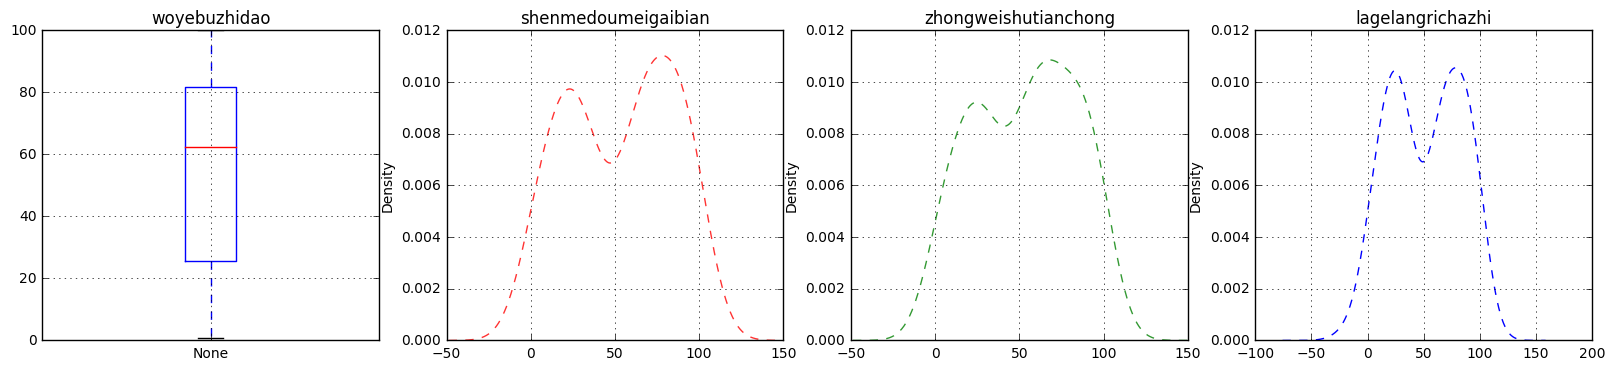

In [49]:
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （3）插值法 —— 拉格朗日插值法，实际运用
data = pd.Series(np.random.rand(100)*100)
data[3,6,33,56,45,66,67,80,90] = np.nan
print(data.head())
print('总数据量:%i' % len(data))
print('------')

data_na = data[data.isnull()]
print('缺失值数据的数量为：',len(data_na))
print('缺失值数据占比为：%.2f%%'%(len(data_na)/len(data)*100))

#中位数填充数据
data_c = data.fillna(data.mean())
fig,axes = plt.subplots(1,4,figsize = (20,4))
data.plot.box(title = 'woyebuzhidao',grid = True,ax = axes[0] )
data.plot(kind = 'kde',linestyle = '--',alpha =0.8,ax = axes[1],color = 'r',grid = True,title = 'shenmedoumeigaibian')
data_c.plot(kind = 'kde',alpha = 0.8,ax = axes[2],grid = True,style = '--g',title = 'zhongweishutianchong')

def na_c(s,n,k=5):
    y = s[list(range(n-k,n+k+1))]
    y = y[y.notnull()]
    return(lagrange(y.index,list(y))(n))

na_re = []
for i in range(len(data)):
    if data.isnull()[i]:
        data[i] = na_c(data,i)
        print(data[i])
        na_re.append(data[i])
data.dropna(inplace = True)
data.plot(kind = 'kde',ax = axes[3],style = '--b',title = 'lagelangrichazhi',grid = True)